<a href="https://colab.research.google.com/github/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ipynb file here](https://github.com/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_T2.ipynb)

In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
sns.set()
%matplotlib inline
import squarify as sq

from statistics import stdev
from scipy.stats import t

In [3]:
# import and load the dataset
data = pd.read_csv("/content/drive/MyDrive/Data/Quantium Forage/chips_trans.csv")
data

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,DATE_BINS
0,0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co,October 2018
1,1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs,May 2019
2,2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths,May 2019
3,3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths,August 2018
4,4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle,August 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle,March 2019
264829,264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos,August 2018
264830,264830,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos,November 2018
264831,264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos,December 2018


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.drop(['DATE_BINS'], axis=1, inplace=True)

In [6]:
#data.rename(columns = {'DATE_BINS':'MONTH_BINS'}, inplace = True)

In [7]:
# using the copy of the dataframe
df1 = data.copy()

In [8]:
df1.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths


In [9]:
# convert 'DATE' to datetime
df1['DATE'] =pd.to_datetime(df1['DATE'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264833 entries, 0 to 264832
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   LIFESTAGE         264833 non-null  object        
 9   PREMIUM_CUSTOMER  264833 non-null  object        
 10  PACK_SIZE         264833 non-null  object        
 11  BRAND_NAME        264833 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.2+ MB


In [10]:
df1.shape

(264833, 12)

In [11]:
# check null values in df1
display(df1.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PACK_SIZE           0
BRAND_NAME          0
dtype: int64

**SELECT CONTROL STORES**

* Trial Stores - 77, 86, 88
* Control stores - stores in operation from July 2018 - June 2019
* Matching trial stores to control stores similar to the trial store prior to
  Feb 2019
* Pre trial period -> July 2018 till Jan 2019

In [12]:
# add a YEARMONTH column
df1["YEARMONTH"] = [pd.to_numeric("".join(str(ym).split('-')[0:2])) for ym in df1['DATE']]
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME,YEARMONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co,201810
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs,201905
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths,201905
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths,201808
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle,201808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle,201903
264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos,201808
264830,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos,201811
264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos,201812


For each month and each store, we calculate:
1. Total sales
2. Number of customers
3. Transaction per customer
4. Chips per transaction
5. Average price per unit

In [13]:
# Monthly total sales
total_sales = df1.groupby(['STORE_NBR', 'YEARMONTH'])["TOT_SALES"].sum().reset_index()
total_sales

,STORE_NBR,YEARMONTH,TOT_SALES
0,1,201807,206.9
1,1,201808,176.1
2,1,201809,278.8
3,1,201810,188.1
4,1,201811,192.6
...,...,...,...
3164,272,201902,395.5
3165,272,201903,442.3
3166,272,201904,445.1
3167,272,201905,314.6


In [14]:
# monthly number of customers
no_of_customers = df1.groupby(['STORE_NBR', 'YEARMONTH'])["LYLTY_CARD_NBR"].nunique().reset_index().rename(columns = {"LYLTY_CARD_NBR": "NBR_OF_CUSTOMERS"})
no_of_customers

,STORE_NBR,YEARMONTH,NBR_OF_CUSTOMERS
0,1,201807,49
1,1,201808,42
2,1,201809,59
3,1,201810,44
4,1,201811,46
...,...,...,...
3164,272,201902,45
3165,272,201903,50
3166,272,201904,54
3167,272,201905,34


In [15]:
# Monthly store transaction per customer
# This is gotten by dividing unique number of TXN_ID by unique LYLTY_CARD_NBR

trans_per_cust = (df1.groupby(['STORE_NBR', 'YEARMONTH'])['TXN_ID'].nunique() / df1.groupby(['STORE_NBR', 'YEARMONTH'])['LYLTY_CARD_NBR'].nunique()).reset_index()
trans_per_cust = trans_per_cust.rename(columns ={0: 'TXN_PER_CUSTOMER'})
trans_per_cust

,STORE_NBR,YEARMONTH,TXN_PER_CUSTOMER
0,1,201807,1.061224
1,1,201808,1.023810
2,1,201809,1.050847
3,1,201810,1.022727
4,1,201811,1.021739
...,...,...,...
3164,272,201902,1.066667
3165,272,201903,1.060000
3166,272,201904,1.018519
3167,272,201905,1.176471


In [16]:
# Monthly store number of chips per transaction
# This is gotten by dividing sum of product quantity by number of unique transaction

chips_per_txn = (df1.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum() / df1.groupby(['STORE_NBR', 'YEARMONTH'])['TXN_ID'].nunique()).reset_index()
chips_per_txn = chips_per_txn.rename(columns ={0: 'CHIPS_PER_TXN'})
chips_per_txn

,STORE_NBR,YEARMONTH,CHIPS_PER_TXN
0,1,201807,1.192308
1,1,201808,1.255814
2,1,201809,1.209677
3,1,201810,1.288889
4,1,201811,1.212766
...,...,...,...
3164,272,201902,1.895833
3165,272,201903,1.905660
3166,272,201904,1.909091
3167,272,201905,1.775000


In [17]:
# Monthly store average price per unit
# This is gotten by using the sum of total sales divided by the sum of product quantity

avg_price_per_unit = (df1.groupby(['STORE_NBR', 'YEARMONTH'])['TOT_SALES'].sum() / df1.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum()).reset_index()
avg_price_per_unit = avg_price_per_unit.rename(columns ={0: 'AVG_PRICE_PER_UNIT'})
avg_price_per_unit

,STORE_NBR,YEARMONTH,AVG_PRICE_PER_UNIT
0,1,201807,3.337097
1,1,201808,3.261111
2,1,201809,3.717333
3,1,201810,3.243103
4,1,201811,3.378947
...,...,...,...
3164,272,201902,4.346154
3165,272,201903,4.379208
3166,272,201904,4.239048
3167,272,201905,4.430986


In [18]:
# Concatenate the dataframes we got above to get the -Measure over time DF-
df_ = [total_sales, no_of_customers['NBR_OF_CUSTOMERS'], trans_per_cust["TXN_PER_CUSTOMER"], chips_per_txn['CHIPS_PER_TXN'], avg_price_per_unit['AVG_PRICE_PER_UNIT']]
df_measureOverTime = pd.concat(df_, join = 'outer', axis = 1)
df_measureOverTime

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.018519,1.909091,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [24]:
# now, we check stores that have no sale(no full observation) during our total observation period
no_sale = pd.pivot_table(df1, index = 'STORE_NBR', columns = 'YEARMONTH', values = 'TXN_ID', aggfunc = 'count')
no_sale

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [28]:
# stores with incomplete observation
no_sale.isnull().sum()

YEARMONTH
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

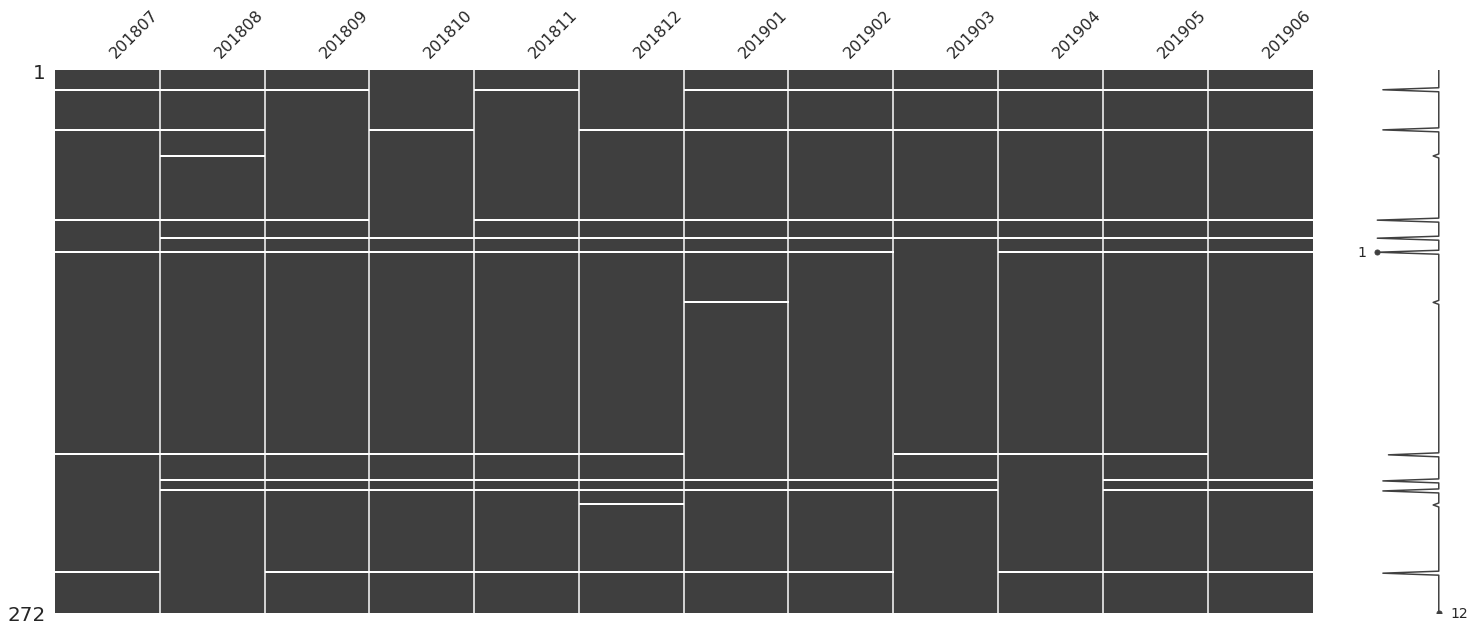

In [29]:
# still checking for incomplete obs
mn.matrix(no_sale)

In [60]:
no_sale_store = no_sale[no_sale.isnull().any(axis=1)].index.to_list()
display(no_sale_store)
print()
length = len(no_sale_store)
print(f"We thus have {length} stores with imcomplete observations")

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]


We thus have 12 stores with imcomplete observations


In [61]:
# now we remove those stores from our df_measureOverTime dataframe
len(df_measureOverTime)

3169

In [67]:
#dropping the null/no_sale_stores
# df_measureOverTime becomes a DataFrame that contains data whose store number is not in the no_sale_store list
df_measureOverTime = df_measureOverTime[~df_measureOverTime['STORE_NBR'].isin(no_sale_store)]
display(len(df_measureOverTime))

3120

In [68]:
df_measureOverTime.shape()

(3120, 7)

In [83]:
# Ctreating a new DataFrame - df_pretrial_m - to contain the period before the trial
# filter df_measureOverTime to get period before 'YEARMONTH' 201902
df_pretrial_m = df_measureOverTime[df_measureOverTime['YEARMONTH'] < 201902]
len(df_pretrial_m)

1820

In [120]:
# calculating correlation between trial store and other stores

def correlationCalc(table, the_metric, trial_store):
    result = pd.DataFrame({'store1': [], 'store2': [], 'correlation': []})
    filter1 = table.loc[table['STORE_NBR'] == trial_store, the_metric]
    filter1.reset_index(drop = True, inplace = True)
    storeNumbers = table['STORE_NBR'].unique()
    for a in storeNumbers:
        filter2 = table.loc[table['STORE_NBR'] == a, the_metric]
        filter2.reset_index(drop = True, inplace = True)
        result = result.append({'store1': trial_store, 'store2': a, 'correlation': filter2.corr(filter1)}, ignore_index = True)
    return result

In [130]:
#calculate magnitude distance

def magnitudeDistanceCalc(table, the_metric, trial_store):
    result = pd.DataFrame({'store1': [], 'store2': [], 'magnitude' : []})
    filter1 = table.loc[table['STORE_NBR'] == trial_store, the_metric]
    filter1.reset_index(drop = True, inplace = True)
    storeNumbers = table['STORE_NBR'].unique()
    for z in storeNumbers:
        filter2 = table.loc[table['STORE_NBR'] == z, the_metric]
        filter2.reset_index(drop = True, inplace = True)
        abs_calc = abs(filter1-filter2)
        mean_calc = np.mean(1-(abs_calc-min(abs_calc))/(max(abs_calc)-min(abs_calc)))
        result = result.append({'store1': trial_store, 'store2': z, 'magnitude': mean_calc}, ignore_index = True)
    return result

Selecting control store for trial 77

In [131]:
# Now we select control store for trial 77 by computing correlation with store 77
the_trial_store = 77
corr_sales_77 = correlationCalc(df_pretrial_m, 'TOT_SALES', the_trial_store)
corr_customers_77 = correlationCalc(df_pretrial_m, 'NBR_OF_CUSTOMERS', the_trial_store)

# calculate magnitude with trial store 77
magn_sales_77 = magnitudeDistanceCalc(df_pretrial_m, 'TOT_SALES', the_trial_store)
magn_customers_77 = magnitudeDistanceCalc(df_pretrial_m, 'NBR_OF_CUSTOMERS', the_trial_store)

In [132]:
#Checking the  for correlation
print('Total Sales Correlation')
display(corr_sales_77.head())
print()
print()
print('Number of Customers Correlation')
corr_customers_77.head()

Total Sales Correlation


,store1,store2,correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652




Number of Customers Correlation


,store1,store2,correlation
0,77.0,1.0,0.322168
1,77.0,2.0,-0.572051
2,77.0,3.0,0.834207
3,77.0,4.0,-0.295639
4,77.0,5.0,0.370659


In [133]:
#Checking the results for magnitude
print('Total Sales Magnitude')
display(magn_sales_77.head())
print()
print()
print('Number of Customers Magnitude')
magn_customers_77.head()

Total Sales Magnitude


,store1,store2,magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320




Number of Customers Magnitude


,store1,store2,magnitude
0,77.0,1.0,0.663866
1,77.0,2.0,0.471429
2,77.0,3.0,0.489796
3,77.0,4.0,0.498258
4,77.0,5.0,0.512605


In [159]:
#Now we concatenate correlation and magnitude (Sales, store 77 as we recall)
corr_magn_sales = pd.concat([corr_sales_77, magn_sales_77['magnitude']], axis = 1)
corr_magn_sales

,store1,store2,correlation,magnitude
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320
...,...,...,...,...
255,77.0,268.0,0.344757,0.429787
256,77.0,269.0,-0.315730,0.559099
257,77.0,270.0,0.315430,0.591547
258,77.0,271.0,0.355487,0.341091


In [160]:
# adding a column to store the calculation of the weighted average
corr_weight = 0.5
corr_magn_sales['weighted_average_sales'] = corr_weight * corr_magn_sales['correlation'] + (1 - corr_weight) * corr_magn_sales['magnitude']
corr_magn_sales.head()

,store1,store2,correlation,magnitude,weighted_average_sales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [161]:
#Now we concatenate correlation and magnitude (Customers, store 77 as we recall)
corr_magn_customers = pd.concat([corr_customers_77, magn_customers_77['magnitude']], axis = 1)
corr_magn_customers

,store1,store2,correlation,magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605
...,...,...,...,...
255,77.0,268.0,0.369517,0.571429
256,77.0,269.0,-0.474293,0.484472
257,77.0,270.0,-0.131259,0.536680
258,77.0,271.0,0.019629,0.328571


In [162]:
# adding a column to store the calculation of the weighted average
corr_magn_customers['weighted_average_customers'] = corr_weight * corr_magn_customers['correlation'] + (1 - corr_weight) * corr_magn_customers['magnitude']
corr_magn_customers.head()

,store1,store2,correlation,magnitude,weighted_average_customers
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [163]:
corr_magn_sales.set_index(['store1', 'store2'], inplace=True)
corr_magn_customers.set_index(['store1', 'store2'], inplace=True)

In [167]:
#create a new DF that stores the weighted averages of both corr_magn_sales and corr_magn_customers
weighted_averages_77 = pd.concat([corr_magn_sales['weighted_average_sales'], corr_magn_customers['weighted_average_customers']], axis=1)
weighted_averages_77

weighted_average_sales  weighted_average_customers
store1 store2                                                    
77.0   1.0                   0.241691                    0.493017
       2.0                   0.163520                   -0.050311
       3.0                   0.664779                    0.662002
       4.0                   0.190817                    0.101310
       5.0                   0.202834                    0.441632
...                               ...                         ...
       268.0                 0.387272                    0.470473
       269.0                 0.121684                    0.005090
       270.0                 0.453489                    0.202710
       271.0                 0.348289                    0.174100
       272.0                 0.320626                    0.384336

[260 rows x 2 columns]

In [169]:
# adding a column [final_weighted_avg] to the DF(weighted_averages_77) to compute the averages of both weighted avg
weighted_averages_77['final_weighted_avg'] = (weighted_averages_77['weighted_average_sales'] + weighted_averages_77['weighted_average_customers']) / 2
weighted_averages_77.head()

weighted_average_sales  weighted_average_customers  \
store1 store2                                                       
77.0   1.0                   0.241691                    0.493017   
       2.0                   0.163520                   -0.050311   
       3.0                   0.664779                    0.662002   
       4.0                   0.190817                    0.101310   
       5.0                   0.202834                    0.441632   

               final_weighted_avg  
store1 store2                      
77.0   1.0               0.367354  
       2.0               0.056604  
       3.0               0.663390  
       4.0               0.146064  
       5.0               0.322233

In [171]:
# check stores with the highest final_weighted_avg
weighted_averages_77.sort_values(by = 'final_weighted_avg', ascending=False).head()

weighted_average_sales  weighted_average_customers  \
store1 store2                                                       
77.0   233.0                 0.697290                    0.816607   
       71.0                  0.789497                    0.663123   
       84.0                  0.656972                    0.715000   
       119.0                 0.636046                    0.729729   
       115.0                 0.708347                    0.645155   

               final_weighted_avg  
store1 store2                      
77.0   233.0             0.756949  
       71.0              0.726310  
       84.0              0.685986  
       119.0             0.682887  
       115.0             0.676751

In [174]:
# for trial store 77
control_store = 233

From above, Store 233 matches trial store 77 with final_weighted_avg of 0.756949

In [175]:
# Let's plot some graphs
# create a new dataframe to use in our plotting

previous_sales = df_pretrial_m.copy()
type_of_store = []

for each in previous_sales['STORE_NBR']:
  if each == the_trial_store:
    type_of_store.append('Trial Store')
  elif each == control_store:
    type_of_store.append('Control Store')
  else:
    type_of_store.append('Other Stores')

previous_sales['store_type'] = type_of_store
previous_sales.head()

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores


In [177]:
previous_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STORE_NBR           1820 non-null   int64  
 1   YEARMONTH           1820 non-null   int64  
 2   TOT_SALES           1820 non-null   float64
 3   NBR_OF_CUSTOMERS    1820 non-null   int64  
 4   TXN_PER_CUSTOMER    1820 non-null   float64
 5   CHIPS_PER_TXN       1820 non-null   float64
 6   AVG_PRICE_PER_UNIT  1820 non-null   float64
 7   store_type          1820 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 128.0+ KB


In [178]:
# we need YEARMONTH in datetime format
previous_sales['transaction_month'] = pd.to_datetime(previous_sales['YEARMONTH'].astype(str), format = '%Y%m')
previous_sales

,STORE_NBR,YEARMONTH,TOT_SALES,NBR_OF_CUSTOMERS,TXN_PER_CUSTOMER,CHIPS_PER_TXN,AVG_PRICE_PER_UNIT,store_type,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549,Other Stores,2018-09-01
3160,272,201810,430.6,44,1.136364,1.980000,4.349495,Other Stores,2018-10-01
3161,272,201811,376.2,41,1.097561,1.933333,4.324138,Other Stores,2018-11-01
3162,272,201812,403.9,47,1.000000,1.893617,4.538202,Other Stores,2018-12-01
